This example project exemplifies the usage of the clesolvepkg module

First, assume we have the following reaction network:

\begin{gather*}
R_1: C3 + C8a \xrightarrow{k_1} C3a + C8a \\
R_2: C8 + C3a \xrightarrow{k_2} C8a + C3a\\
R_3: C3a + IAP \xrightarrow{k_3} IAP \sim C3a \\
R_4: IAP \sim C3a \xrightarrow{k_{-3}} IAP + C3a \\
R_5: IAP + C3a \xrightarrow{k_{4}} C3a\\
R_6: C8a \xrightarrow{k_{5}} \empty \\
R_7: C3a \xrightarrow{k_{6}} \empty \\
R_8: IAP \sim C3a \xrightarrow{k_{7}} \empty \\
R_9: IAP \xrightarrow{k_{8}} \empty \\
R_{10}: \empty \xrightarrow{k_{-8}} IAP \\
R_{11}: C8 \xrightarrow{k_{9}} \empty \\
R_{12}: \empty \xrightarrow{k_{-9}} C8 \\
R_{13}: C3 \xrightarrow{k_{10}} \empty \\
R_{14}: \empty \xrightarrow{k_{-10}} C3 \\
R_{15}: C8a + CARP \xrightarrow{k_{11}} C8a \sim CARP \\
R_{16}: C8a \sim CARP \xrightarrow{k_{-11}} C8a + CARP \\
R_{17}: CARP \xrightarrow{k_{12}} \empty \\
R_{18}: \empty  \xrightarrow{k_{-12}} CARP\\
R_{19}: C8a \sim CARP \xrightarrow{k_{13}} \empty \\
\end{gather*}

Where I assume the rates are given by:

Table 1: Parameter values and initial conditions for the model of Eissing et al. (2004). ('mo' is the abbreviation for 'molecules'.)

| Parameter  |  Value                |  Unit           |  Initial condition   |  Value  |  Unit     |
|------------|-----------------------|-----------------|----------------------|---------|-----------|
| $k_1$      |  $5.8\cdot 10^{-5}$   |  cell/(mo min)  |  $[C8](0)$             |  $130\ 000$   | mo/cell       |
| $k_2$      |  $1.0\cdot 10^{-5}$   |  cell/(mo min)  |  $[C8a](0)$            |  0      |  mo/cell  |
| $k_3$      |  $5.0\cdot 10^{-4}$   |  cell/(mo min)  |  $[C3](0)$             |  $21\ 000$   | mo/cell       |
| $k_{-3}$   |  $0.21$               |  1/min          |  $[C3a](0)$            |  0      |  mo/cell  |
| $k_4$      |  $3.0\cdot 10^{-4}$   |  cell/(mo min)  |  $[CARP](0)$           |  $40\ 000$   | mo/cell       |
| $k_5$      |  $5.8\cdot 10^{-3}$   |  1/min          |  $[C8a\sim CARP](0)$  |  0      |  mo/cell  |
| $k_6$      |  $5.8\cdot 10^{-3}$   |  1/min          |  $[IAP](0)$            |  $40\ 000$   | mo/cell       |
| $k_7$      |  $1.73\cdot 10^{-2}$  |  1/min          |  $[C3a\sim IAP](0)$   |  0      |  mo/cell  |
| $k_8$      |  $1.16\cdot 10^{-2}$  |  1/min          |                      |         |           |
| $k_{-8}$   |  $464$                |  mo/(cell min)  |                      |         |           |
| $k_9$      |  $3.9\cdot 10^{-3}$   |  1/min          |                      |         |           |
| $k_{-9}$   |  $507$                |  mo/(cell min)  |                      |         |           |
| $k_{10}$   |  $3.9\cdot 10^{-3}$   |  1/min          |                      |         |           |
| $k_{-10}$  |  $81.9$               |  mo/(cell min)  |                      |         |           |
| $k_{11}$   |  $5.0\cdot 10^{-4}$   |  cell/(mo min)  |                      |         |           |
| $k_{-11}$  |  $0.21$               |  1/min          |                      |         |           |
| $k_{12}$   |  $1.0\cdot 10^{-3}$   |  1/min          |                      |         |           |
| $k_{-12}$  |  40                   |  mo/(cell min)  |                      |         |           |
| $k_{13}$   |  $1.16\cdot 10^{-2}$  |  1/min          |                      |         |           |

We can use the following code to simulate the Chemical Langevin Equation: 

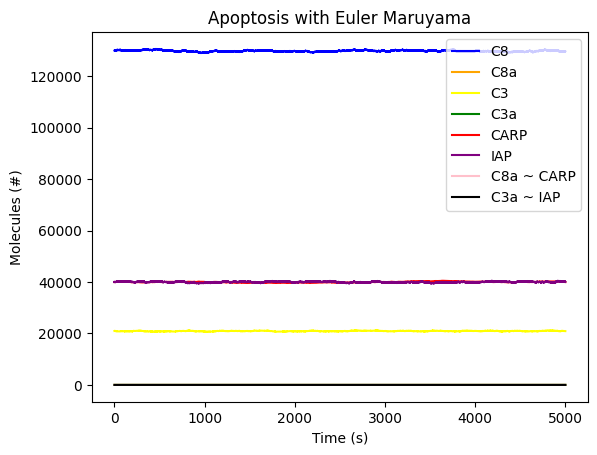

In [2]:
from clesolvepkg import solve_cle
from clesolvepkg import Model
from clesolvepkg import plot_cle
import numpy as np
import matplotlib.pyplot as plt

# Define labels for the different species for plotting
labels = ['C8','C8a','C3','C3a','CARP','IAP','C8a ~ CARP', 'C3a ~ IAP']

# Define different initial values
x0 = np.array([130000,0,21000,0,40000,40000,0,0])

def get_propensities(x:np.array,k:np.array):
    #x is the array containing concentrations
    #k is the reaction rate array
    #rates are ordered: k_1 <-> k[0], k_2 <-> 1, k_3 <-> 2, k_{-3} <-> 3, k_{4} <-> 4, k_5 <-> 5, k_6 <-> 6, k_7 <-> 7, k_8 <-> 8, k_{-8} <-> 9
    #k_{9} <-> 10, k_{-9} <-> 11, k_{10} <-> 12, k_{-10} <-> 13, k_{11} <-> 14, k_{-11} <-> 15, k_{12} <-> 16
    return np.array([k[0] * x[2] * x[1],
        k[1] * x[0] * x[3],
        k[2] * x[3] * x[5],
        k[3] * x[7],
        k[4] * x[5] * x[3],
        k[5] * x[1],
        k[6] * x[3],
        k[7] * x[7],
        k[8] * x[5],
        k[9],
        k[10] * x[0],
        k[11],
        k[12] * x[2],
        k[13],
        k[14] * x[1] * x[4],
        k[15] * x[6],
        k[16] * x[4],
        k[17],
        k[18]*x[6]])

# Write down the rates from the above table
table_rates = np.array([
    5.8 * (10**(-5)),
    1.0 * (10**(-5)),
    5.0 * (10**(-4)),
    0.21,
    3.0 * (10**(-4)),
    5.8 * (10**(-3)),
    5.8 * (10**(-3)),
    1.73 * (10**(-2)),
    1.16 * (10**(-2)),
    464,
    3.9 * (10**(-3)),
    507,
    3.9 * (10**-3),
    81.9,
    5.0 * (10**(-4)),
    0.21,
    1.0 * (10**(-3)),
    40,
    1.16 * (10**-2)
])

reactants = np.array([[0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
                      [1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0],
                      [1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
                      [0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0],
                      [0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1],
                      [0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0]])

products  =    np.array([[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
                      [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
                      [1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0],
                      [0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
                      [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

#Define a model object for the different initial values
model = Model(reactants,products,x0,table_rates,get_propensities)

plt.title("Apoptosis with Euler Maruyama")
plt.xlabel("Time (s)")
plt.ylabel("Molecules (#)")
# Solve the first model using the Euler Maruyama solver
result_1 = solve_cle(model,np.linspace(0,5000,100000),0)
plt.plot(np.linspace(0,5000,100000),result_1[:,0],label="C8",color="b")
plt.plot(np.linspace(0,5000,100000),result_1[:,1],label="C8a",color="orange")
plt.plot(np.linspace(0,5000,100000),result_1[:,2],label="C3",color="yellow")
plt.plot(np.linspace(0,5000,100000),result_1[:,3],label="C3a",color="green")
plt.plot(np.linspace(0,5000,100000),result_1[:,4],label="CARP",color="red")
plt.plot(np.linspace(0,5000,100000),result_1[:,5],label="IAP",color="purple")
plt.plot(np.linspace(0,5000,100000),result_1[:,6],label="C8a ~ CARP",color="pink")
plt.plot(np.linspace(0,5000,100000),result_1[:,7],label="C3a ~ IAP",color="black")
plt.legend()
plt.show()
plt.clf()

# It is possible to use the itoint solver from sdeint instead. But this takes very long
'''
plt.title("Apoptosis with itoint")
plt.xlabel("Time (s)")
plt.ylabel("Molecules (#)")
# Solve this model instance using the itoint function given by sdeint
result_2 = solve_cle(model,np.linspace(0,5000,100000),1)
plt.plot(np.linspace(0,5000,100000),result_2[:,0],label="C8",color="b")
plt.plot(np.linspace(0,5000,100000),result_2[:,1],label="C8a",color="orange")
plt.plot(np.linspace(0,5000,100000),result_2[:,2],label="C3",color="yellow")
plt.plot(np.linspace(0,5000,100000),result_2[:,3],label="C3a",color="green")
plt.plot(np.linspace(0,5000,100000),result_2[:,4],label="CARP",color="red")
plt.plot(np.linspace(0,5000,100000),result_2[:,5],label="IAP",color="purple")
plt.plot(np.linspace(0,5000,100000),result_2[:,6],label="C8a ~ CARP",color="pink")
plt.plot(np.linspace(0,5000,100000),result_2[:,7],label="C3a ~ IAP",color="black")
plt.legend()
plt.show()
plt.clf()
'''


# Use the integrated plotting functionality of the module
plot_cle(model,np.linspace(0,5000,100000),0,labels)